In [2]:
import copy
import math
import copy
import matplotlib.pyplot as plt
import numpy as np
# 6.3.d
X = []
with open("noisyOrX.txt", "r") as xf:
    for line in xf.readlines():
        X.append(line.strip('\n').split(' ')[:23])
for i in range(len(X)):
    for j in range(len(X[0])):
        X[i][j] = int(X[i][j])
Y = []
with open("noisyOrY.txt", "r") as yf:
    for line in yf.readlines():
        Y.append(int(line))


def prob(i, x: list, y, p):
    num = y * x[i] * p[i]
    res1 = 1
    for j in range(len(x)):
        res1 *= ((1 - p[j]) ** x[j])
    denom = 1 - res1
    return num / denom


T = []
for j in range(len(X[0])):
    res = 0
    for i in range(len(X)):
        if X[i][j] == 1:
            res += 1
    T.append(res)


def update(i, p: list, X: list, Y, T: list):
    Ti = T[i]
    sum1 = 0
    for t in range(len(X)):
        sum1 += prob(i, X[t], Y[t], p)
    return sum1 / Ti


def likelihood(p, X, Y):
    sum1 = 0
    for t in range(len(X)):
        prod = 1
        for i in range(len(X[0])):
            prod = prod * ((1 - p[i]) ** X[t][i])
        if Y[t] == 1:
            sum1 += math.log(1 - prod)
        else:
            sum1 += math.log(prod)

    return sum1 / len(X)


def mistake(p, X, Y):
    M = 0

    for t in range(len(X)):
        prod = 1
        for i in range(len(X[0])):
            prod *= (1 - p[i]) ** X[t][i]
        if Y[t] == 0:
            if 1 - prod >= 0.5:
                M += 1
        if Y[t] == 1:
            if 1 - prod <= 0.5:
                M += 1
    return M


def em(iters, X, Y, T):
    p = [0.05] * 23
    L = likelihood(p, X, Y)
    M = mistake(p, X, Y)
    print(f"0: {M}, {L}")
    for k in range(1, iters + 1):
        temp_p = copy.deepcopy(p)
        for i in range(len(p)):
            p[i] = update(i, temp_p, X, Y, T)
        if math.log(k, 2) == int(math.log(k, 2)):
            L = likelihood(p, X, Y)
            M = mistake(p, X, Y)
            print(f"{k}: {M}, {L}")


em(256, X, Y, T)











0: 175, -0.9580854082157914
1: 56, -0.49591639407753635
2: 43, -0.40822081705839114
4: 42, -0.3646149825001877
8: 44, -0.34750061620878253
16: 40, -0.33461704895854844
32: 37, -0.32258140316749784
64: 37, -0.3148266983628559
128: 36, -0.3111558472151897
256: 36, -0.310161353474076


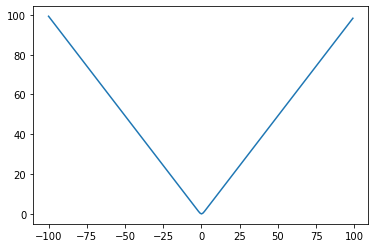

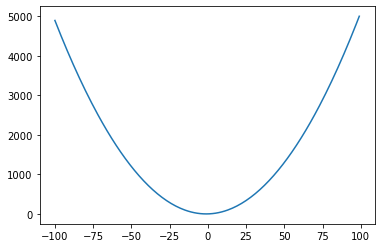

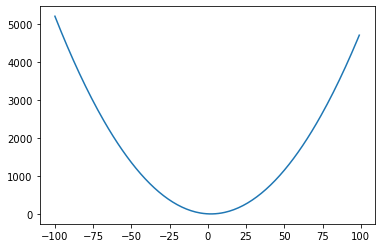

In [3]:
# 6.4.c
b1x = []
b1y = []
for i in range(-100, 100):
    b1x.append(i)
    b1y.append(np.log(np.cosh(i)))
plt.plot(b1x, b1y)
plt.show()
b2x = []
b2y = []
for i in range(-100, 100):
    b2x.append(i)
    res = np.log(np.cosh(-2))+np.tanh(-2) * (i + 2) + 0.5 * ((i + 2) ** 2)
    b2y.append(res)
plt.plot(b2x, b2y)
plt.show()
b3x = []
b3y = []
for i in range(-100, 100):
    b3x.append(i)
    res = np.log(np.cosh(3))+np.tanh(3) * (i - 3) + 0.5 * ((i - 3) ** 2)
    b3y.append(res)
plt.plot(b3x, b3y)
plt.show()

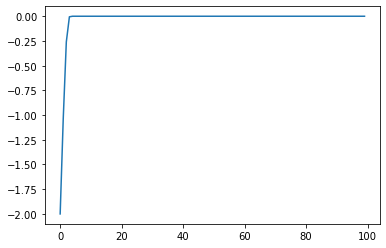

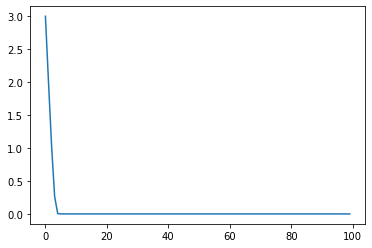

In [4]:
# 6.4.f
# x_n+1 = x_n - tanh(x)

x0 = -2
nArr = []
xArr = []
for i in range(100):
    nArr.append(i)
    xArr.append(x0)
    x0 = x0 - np.tanh(x0)
plt.plot(nArr, xArr)
plt.show()

x0 = 3
nArr = []
xArr = []
for i in range(100):
    nArr.append(i)
    xArr.append(x0)
    x0 = x0 - np.tanh(x0)
plt.plot(nArr, xArr)
plt.show()


[-2, 11.644958598563875, -3255536207.1877036, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


<ipython-input-5-64a119fe3e9a>:8: RuntimeWarning: overflow encountered in sinh
  x0 = x0 - np.sinh(x0) * np.cosh(x0)
<ipython-input-5-64a119fe3e9a>:8: RuntimeWarning: overflow encountered in cosh
  x0 = x0 - np.sinh(x0) * np.cosh(x0)
<ipython-input-5-64a119fe3e9a>:8: RuntimeWarning: invalid value encountered in double_scalars
  x0 = x0 - np.sinh(x0) * np.cosh(x0)


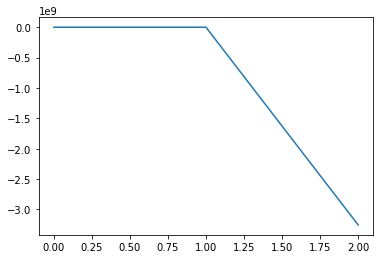

<ipython-input-5-64a119fe3e9a>:19: RuntimeWarning: overflow encountered in sinh
  x0 = x0 - np.sinh(x0) * np.cosh(x0)
<ipython-input-5-64a119fe3e9a>:19: RuntimeWarning: overflow encountered in cosh
  x0 = x0 - np.sinh(x0) * np.cosh(x0)
<ipython-input-5-64a119fe3e9a>:19: RuntimeWarning: invalid value encountered in double_scalars
  x0 = x0 - np.sinh(x0) * np.cosh(x0)


[3, -97.85657868513961, 2.4836150932578143e+84, -inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


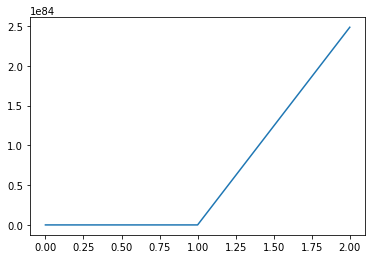

In [5]:
# 6.4.g
x0 = -2
nArr = []
xArr = []
for i in range(100):
    nArr.append(i)
    xArr.append(x0)
    x0 = x0 - np.sinh(x0) * np.cosh(x0)
plt.plot(nArr, xArr)
print(xArr)
plt.show()

x0 = 3
nArr = []
xArr = []
for i in range(100):
    nArr.append(i)
    xArr.append(x0)
    x0 = x0 - np.sinh(x0) * np.cosh(x0)
plt.plot(nArr, xArr)
print(xArr)
plt.show()

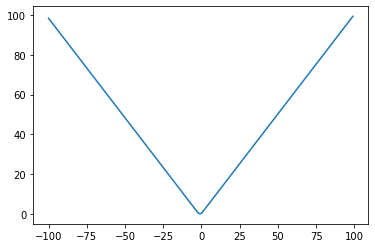

In [6]:
# 6.4.h
xArr = []
gArr = []
for i in range(-100, 100):
    sumh = 0
    for k in range(1, 11):
        sumh += np.log(np.cosh(i + 2/np.sqrt(k)))
    xArr.append(i)
    gArr.append(sumh / 10)
plt.plot(xArr, gArr)
plt.show()

[2, 1.0061451772465695, 0.049939702268616215, -0.6934594956924488, -0.94527953722007, -0.9760448205051371, -0.9795316550334733, -0.9799309378061212, -0.9799767255008595, -0.9799819770724016, -0.9799825794074072, -0.9799826484930614, -0.9799826564169388, -0.9799826573257793, -0.9799826574300201, -0.9799826574419761, -0.9799826574433474, -0.9799826574435047, -0.9799826574435228, -0.9799826574435249, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.9799826574435251, -0.97998265

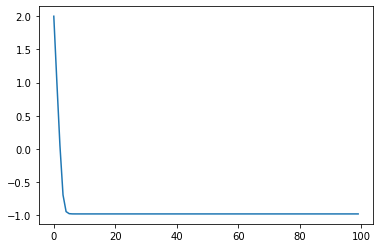

In [7]:

# 6.4.k
xArr = []
gArr = []
x0 = 2
for i in range(100):
    xArr.append(i)
    gArr.append(x0)
    sumh = 0
    for k in range(1, 11):
        sumh += np.tanh(x0 + 2/np.sqrt(k))
    x0 = x0 - sumh * 0.1
print(gArr)
plt.plot(xArr, gArr)
plt.show()